## pandas plot
- pandas로도 간단하게 그래프를 표현할 수 있음
###  kind : str
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot
    - 'hexbin' : hexbin plot

## reference
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# jupyter notebook내에 그래프 표현
%matplotlib inline

# 한글폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제 해결
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
#plt.rc("font", family="Malgun Gothic") # 한글깨짐 for windows
#plt.rc("font", family="AppleGothic") # 한글깨짐 for mac

## reference 에 있는 코드로 실습

### 1) plot

- np.random.randn : 난수 발생
    - np.random.randn() # 1개의 난수 발생
    - np.random.randn(10) # 10개의 난수 발생
    - np.random.randn(10, 2) # 10x2의 형태로 난수 발생

In [3]:
np.random.randn(10, 2).shape

(10, 2)

- plt.figure() 는 figure의 속성을 변경하는데 사용되는 함수이다. 크기를 변경하려면 plt.figure(figsize=(15, 5)) 와 같이 가로/세로 크기를 준다. 이 때 단위는 '인치'이다.
- pandas 예제는 현재 의미없는 코드임

In [4]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts

2000-01-01   -0.982796
2000-01-02   -1.999037
2000-01-03    0.279183
2000-01-04    1.103207
2000-01-05   -1.352138
                ...   
2002-09-22    1.940046
2002-09-23    0.721751
2002-09-24    0.026408
2002-09-25   -0.301553
2002-09-26   -0.289200
Freq: D, Length: 1000, dtype: float64

In [5]:
ts = ts.cumsum()
ts

2000-01-01   -0.982796
2000-01-02   -2.981833
2000-01-03   -2.702650
2000-01-04   -1.599443
2000-01-05   -2.951581
                ...   
2002-09-22    0.109709
2002-09-23    0.831460
2002-09-24    0.857868
2002-09-25    0.556315
2002-09-26    0.267115
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

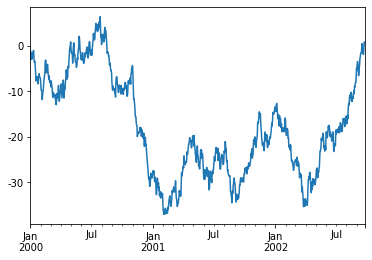

In [6]:
ts.plot()

In [7]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))

In [8]:
df.head()

,A,B,C,D
2000-01-01,-1.871134,-0.714821,0.180679,-0.482371
2000-01-02,0.219210,0.999296,-2.171725,0.490080
2000-01-03,-0.606015,1.057861,1.039344,-1.824200
2000-01-04,-1.170598,-1.565389,-1.292385,0.620336
2000-01-05,-2.269637,-0.643919,-0.297441,1.909631


In [9]:
df2 = df.cumsum()
df2

,A,B,C,D
2000-01-01,-1.871134,-0.714821,0.180679,-0.482371
2000-01-02,-1.651924,0.284475,-1.991046,0.007709
2000-01-03,-2.257939,1.342336,-0.951702,-1.816492
2000-01-04,-3.428537,-0.223053,-2.244087,-1.196155
2000-01-05,-5.698174,-0.866971,-2.541528,0.713476
...,...,...,...,...
2002-09-22,31.827047,28.727149,-8.436917,-16.697530
2002-09-23,30.573136,29.426241,-9.223850,-17.300489
2002-09-24,32.035470,28.563173,-7.699978,-16.901973
2002-09-25,32.427535,28.721668,-7.928063,-18.058440


<AxesSubplot:>

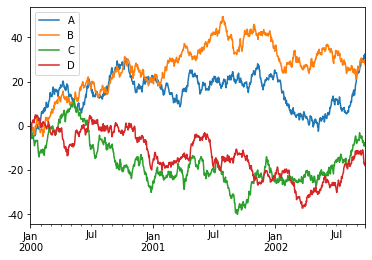

In [10]:
# On DataFrame, plot() is a convenience to plot all of the columns with labels
df2.plot() #  default : x축은 index를 y축은 column으로 하였으며, 각 y축을 legend로 표현함

In [ ]:
np.random.randn?

In [11]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=["B", "C"]).cumsum()
df3["A"] = pd.Series(list(range(len(df3))))
df3

,B,C,A
0,0.067752,-1.126645,0
1,-0.225201,0.331059,1
2,1.032982,-1.088885,2
3,2.164348,-0.072623,3
4,1.756735,-0.222066,4
...,...,...,...
995,7.576567,-56.723662,995
996,8.307070,-58.153011,996
997,7.867835,-57.483155,997
998,7.684186,-58.060336,998


<AxesSubplot:xlabel='A'>

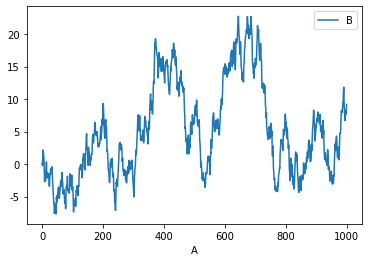

In [12]:
df3.plot(x="A", y="B")

<AxesSubplot:xlabel='A'>

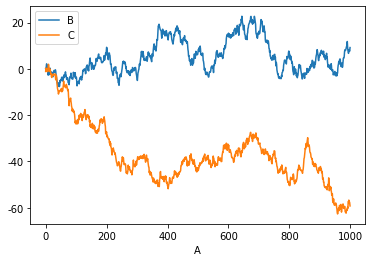

In [13]:
df3.plot(x="A", y=["B", "C"])

### 2) bar

In [14]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
df.head()

,A,B,C,D
2000-01-01,1.601918,0.954391,-1.354319,-0.929365
2000-01-02,-0.312595,0.651756,0.573708,1.456798
2000-01-03,-1.014792,1.603103,-0.756829,1.502262
2000-01-04,0.655796,-1.311979,-0.840242,1.015105
2000-01-05,0.012412,-1.039594,0.858167,-0.367412


In [15]:
df.iloc[5]

A    0.105561
B    2.541621
C    1.436453
D   -0.470809
Name: 2000-01-06 00:00:00, dtype: float64

<AxesSubplot:>

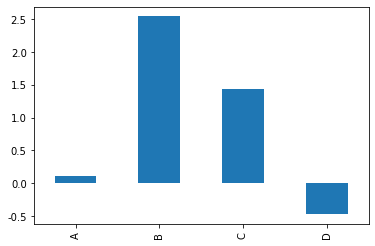

In [16]:
df.iloc[5].plot(kind="bar")

<AxesSubplot:>

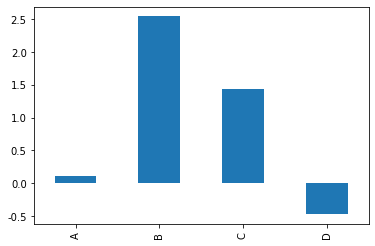

In [17]:
df.iloc[5].plot.bar()

In [18]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
df2.head()

,a,b,c,d
0,0.652781,0.750088,0.035249,0.295725
1,0.380578,0.346369,0.451095,0.005991
2,0.522846,0.724202,0.543425,0.661983
3,0.363064,0.419981,0.969149,0.105947
4,0.472265,0.322713,0.806233,0.585289


<AxesSubplot:>

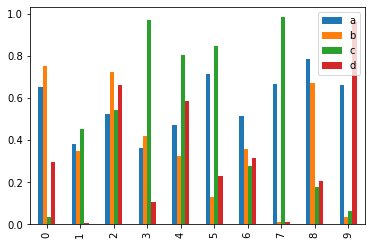

In [19]:
df2.plot.bar() # x=index, y=column value, legend=column

<AxesSubplot:>

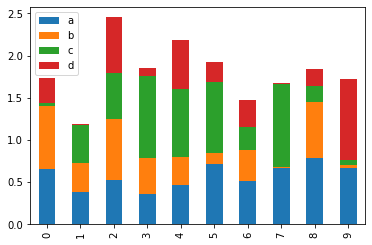

In [20]:
df2.plot.bar(stacked=True)

In [21]:
df2.sum(axis=1) ## stacked=True로 그린 값은 누적된 값임을 알 수 있다.

0    1.733842
1    1.184033
2    2.452455
3    1.858141
4    2.186499
5    1.922418
6    1.470808
7    1.670716
8    1.839971
9    1.726624
dtype: float64

<AxesSubplot:>

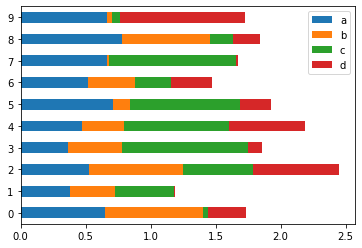

In [22]:
df2.plot.barh(stacked=True)

### 3) box plot

#### box plot 설명 
* [boxplot 설명](https://ai-creator.tistory.com/569)

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


* 더 읽어보기 
    - [박스 플롯에 대하여 :: -[|]- Box and Whisker](https://boxnwhis.kr/2019/02/19/boxplot.html)
    - [상자 수염 그림 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC)

In [23]:
df = pd.DataFrame(np.random.rand(10, 5), columns=["A", "B", "C", "D", "E"])
df.describe() ## 25%, 50%, 75% -> N사분위수 표현가능

,A,B,C,D,E
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.458560,0.535666,0.476262,0.586766,0.589887
std,0.278300,0.186516,0.333600,0.313598,0.364090
min,0.031403,0.232591,0.064366,0.065344,0.034525
25%,0.281517,0.390545,0.184151,0.342836,0.345757
50%,0.437941,0.544774,0.479939,0.590411,0.639508
75%,0.622709,0.672022,0.736091,0.872908,0.883458
max,0.933902,0.804147,0.945189,0.963782,0.994996


<AxesSubplot:>

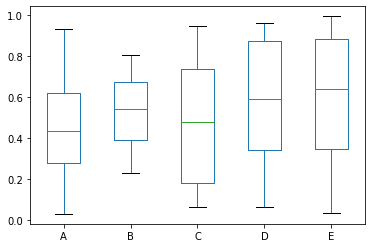

In [24]:
df.plot.box()

### 4) scatter

In [25]:
import seaborn as sns

In [26]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df["species"] = pd.Categorical(["setosa"] * 20 + ["versicolor"] * 20 + ["virginica"] * 10 )
df

,a,b,c,d,species
0,0.243715,0.604606,0.777893,0.856213,setosa
1,0.545189,0.589628,0.718948,0.151548,setosa
2,0.486323,0.294708,0.292437,0.973062,setosa
3,0.868027,0.256520,0.619090,0.549936,setosa
4,0.377310,0.602861,0.271250,0.574241,setosa
5,0.716785,0.299699,0.147894,0.776168,setosa
6,0.158956,0.973837,0.328937,0.959477,setosa
7,0.884334,0.417667,0.549369,0.814516,setosa
8,0.654820,0.299458,0.132610,0.042716,setosa
9,0.059729,0.908087,0.084581,0.080949,setosa


<AxesSubplot:xlabel='a', ylabel='b'>

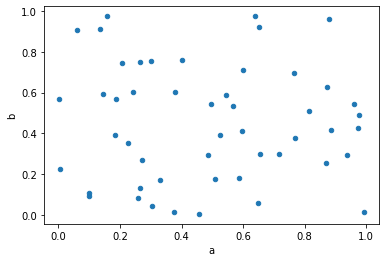

In [27]:
df.plot.scatter(x="a", y="b")

<AxesSubplot:xlabel='c', ylabel='d'>

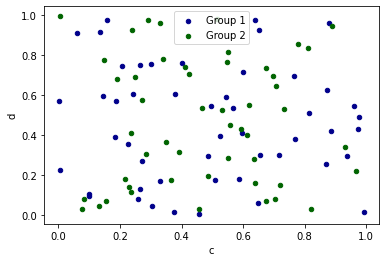

In [28]:
ax = df.plot.scatter(x="a", y="b", color="DarkBlue", label="Group 1")
df.plot.scatter(x="c", y="d", color="DarkGreen", label="Group 2", ax=ax) # ax를 넣어줌으로써 그래프는 총 2번이 그려짐

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:xlabel='a', ylabel='b'>

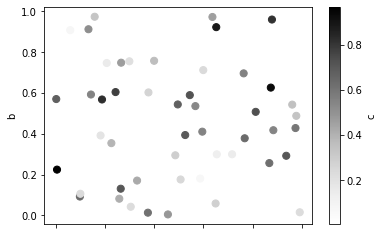

In [29]:
df.plot.scatter(x="a", y="b", c="c", s=50)

### 5) pie

In [32]:
series = pd.Series(3 * np.random.rand(4), index=["a", "b", "c", "d"], name="series")
series

a    2.108446
b    0.724269
c    0.625357
d    2.423444
Name: series, dtype: float64

<AxesSubplot:ylabel='series'>

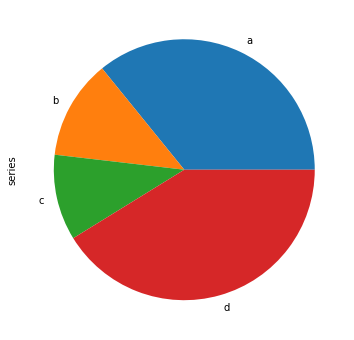

In [33]:
series.plot.pie(figsize=(6, 6))

<AxesSubplot:ylabel='series'>

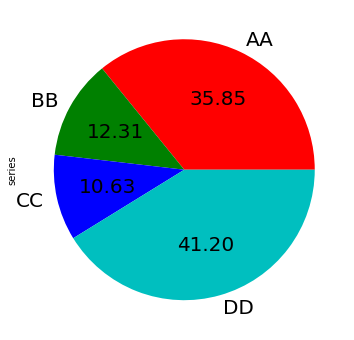

In [34]:
series.plot.pie(
                labels=["AA", "BB", "CC", "DD"],
                colors=["r", "g", "b", "c"],
                autopct="%.2f", # auto percentage
                fontsize=20,
                figsize=(6, 6)
               )

# ㅁ 코로나 데이터 사용
- **data/서울시 코로나19 확진자 현황.csv**
파일을 이용하여 다음과 같은 2가지 그래프를 완성하세요.
***
1. 일별 코로나 확진자 발생 추이
<img src='https://drive.google.com/uc?id=1E18OC53eLVPAlxCsKWxU1PhLJTq5ZQYS'><br></br>

2. 일별 코로나 확진자 누적 추이
<img src='https://drive.google.com/uc?id=10gVYLDfNK1ZeJvkRwPILsfSSlG7J27V2'><br></br>

In [37]:
df = pd.read_csv("../3 weeks hw/서울시 코로나19 확진자 현황.csv")
df.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,77940,2021-08-27,NaN,NaN,NaN,타시도,NaN,수도권 소재 실내체육시설 관련,NaN,-,NaN,2021-08-28 10:23:11,2021-08-28 10:23:11,Y
1,77939,2021-08-27,NaN,NaN,NaN,타시도,NaN,기타 확진자 접촉,NaN,-,NaN,2021-08-28 10:23:11,2021-08-28 10:23:11,Y
2,77938,2021-08-27,NaN,NaN,NaN,강남구,NaN,감염경로 조사중,NaN,-,NaN,2021-08-28 10:23:11,2021-08-28 10:23:11,Y
3,77937,2021-08-27,NaN,NaN,NaN,타시도,NaN,타시도 확진자 접촉,NaN,-,NaN,2021-08-28 10:23:11,2021-08-28 10:23:11,Y
4,77936,2021-08-27,NaN,NaN,NaN,금천구,NaN,감염경로 조사중,NaN,-,NaN,2021-08-28 10:23:11,2021-08-28 10:23:11,Y


<AxesSubplot:xlabel='확진일'>

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 51652 missing from cur

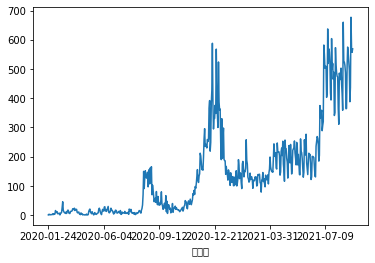

In [39]:
g = df.groupby(by="확진일").size()
g.plot()

<AxesSubplot:xlabel='확진일'>

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 51652 missing from cur

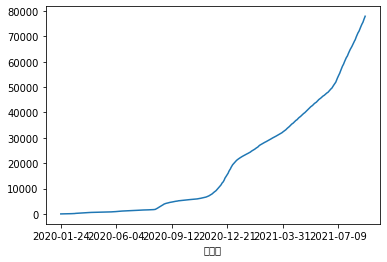

In [40]:
c = g.cumsum()
c.plot()

<AxesSubplot:>

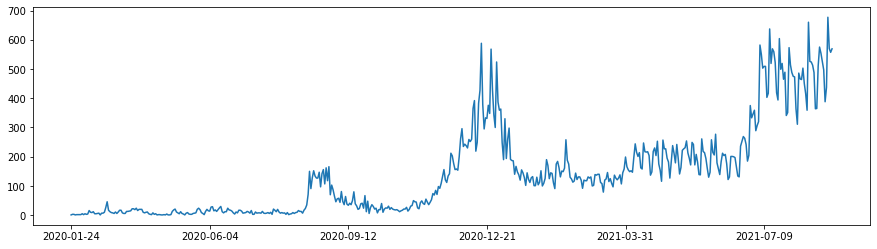

In [41]:
df["확진일"].value_counts().sort_index().plot(figsize=(15, 4))

<AxesSubplot:>

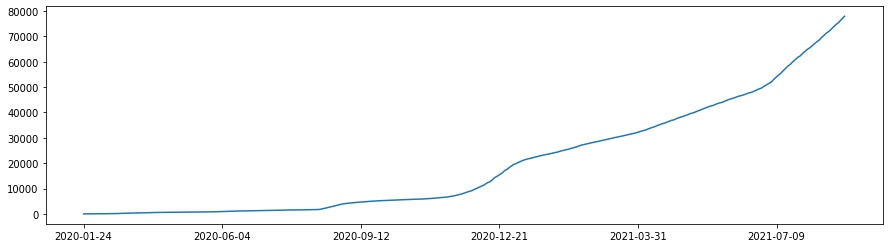

In [43]:
df["확진일"].value_counts().sort_index().cumsum().plot(figsize=(15, 4))